# Assignment 3.

AMAT 503 -- M. Lamoureux

Posted March 15. Due Thursday, March 22.

This is a numerical assignment, you can complete it on Python [ucalgary.syzygy.ca](https://ucalgary.syzygy.ca) or Matlab, or whatever.



In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import convolve2d

## Discrete convolution.

You should get used to the idea that we can do convolution by formula, by code, or have an intuitive understanding of how it works.

Symmetric functions are a good place to start, as the results are also symmetric so there is less confusion as to what the result should be. 

In the midterm, you were asked to convolve $(1,1,1,1,0,0,\ldots)$ with $(1,1,1,1,0,0,\ldots)$. You can do this by hand, with the formula
$$z_k = \sum _j x_{k-j}y_j. $$

You can also do it numerically, using the "convolve" function from Numpy:

In [2]:
convolve([1,1,1,1],[1,1,1,1,1])

array([1, 2, 3, 4, 4, 3, 2, 1])

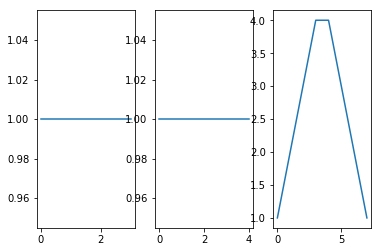

In [3]:
subplot(1,3,1)
plot([1,1,1,1])
subplot(1,3,2)
plot([1,1,1,1,1])
subplot(1,3,3)
plot(convolve([1,1,1,1],[1,1,1,1,1]))

You should notice the "support" ot the function expands as you convolve. First funciton supported on interval $[0,3]$, second on $[0,4]$, results has support $[0,7]$.

You get slightly better pictures by inserting some zeros on either size.

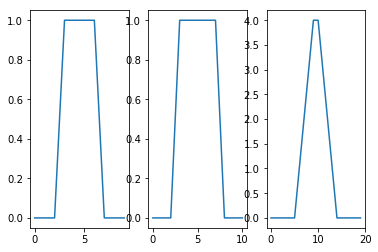

In [4]:
subplot(1,3,1)
plot([0,0,0,1,1,1,1,0,0,0],)
subplot(1,3,2)
plot([0,0,0,1,1,1,1,1,0,0,0], )
subplot(1,3,3)
plot(convolve([0,0,0,1,1,1,1,0,0,0],[0,0,0,1,1,1,1,1,0,0,0]),)

## Q1.

Let $x = (0,0,1,1,1,1,1,1,\ldots, 1,1,1,0,0,0)$ be a vector with a long sting of 1's, surrounded by a few zeros. (e.g. twenty 1's, even one hundred ones.)

Plot $x$ and its (numerical) convolution with itself once, twice, three times, four times. 

(i.e. $x, x*x, x*x*x, x*x*x*x, x*x*x*x*x$)

Can you describe the curves you get?


## Continuous convolution (convolution on the real line)

The convolution of two functions on the real line is given by
$$f*g(t) = \int_{-\infty}^\infty f(t-s) g(s) \,ds.$$

Numerically, we can compute the integral by Riemann sums. So we replace the integral with a sum, and the variable $s$ with steps $j \Delta_s$, where $\Delta$ is a small number, and $j$ is an integer index. This gives the approximations
$$f*g(t) \approx \sum_{j=-\infty}^\infty f(t-j\Delta) g(j\Delta) \Delta.$$
Replacig $t$ with a sample at $k\Delta$, and moving the constant $\Delta$ to the front, we get the sampled version
$$f*g(k\Delta) \approx \Delta\sum_{j=-\infty}^\infty f((k-j)\Delta) g(j\Delta) .$$

This is exactly the formula for discrete convolutions, with vectors $x_j = f(j\Delta), y_j = g(j\Delta), z_k = (f*g)(k\Delta).$

This tells you how to approximate a continuous convolution using the numerical, discrete convolution.
- fix a step size $\Delta$
- sample the functions $f,g$ using this steps size. Sample wide enough to catch non-zero elements
- numerically convolve the two vectors of samples, and scale by $\Delta$
- if necessary, repeat with a smaller $\Delta$ to get a better approximation

Note that you should think about the resulting domain of the functions. 

For example, let's take the function from the assignment, a step function times an inverted parabola.



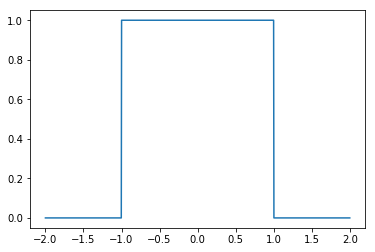

In [5]:
def f(t):
    return (t>-1)*(t<1)

t = linspace(-2,2,1000)
plot(t,f(t))

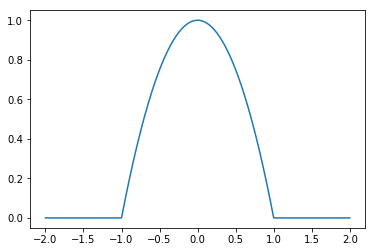

In [6]:
def g(t):
    return (t>-1)*(t<1)*(1-t*t)

t = linspace(-2,2,1000)
plot(t,g(t))

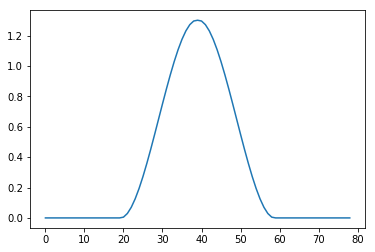

In [7]:
Delta = .1
t = linspace(-2,2,round(4/Delta))
x = f(t)
y = g(t)
z = Delta*convolve(x,y)
plot(z)

What about the horizontal axis?

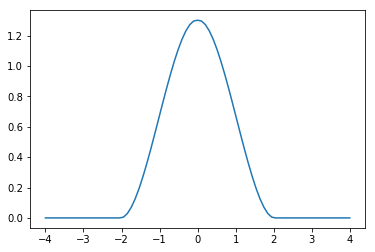

In [8]:
tt = linspace(-4,4,size(z))
plot(tt,z)

## Q2.

Repeat the above calculation using a Gaussian $e^{-t^2}$ for both $f(t)$ and $g(t)$. Choose an appropriate range for the horizontal axis (like the $[-2,2]$ in the above example, and plot the result, using appropriate range for the resulting horizontal axis. 

Do this for 2 or 3 different values of $\Delta$ to see if the approximation is getting better.

What curve does the result look like? What is its width, and how does that compare with the widths of the originial two Gaussians?

## Q3.
As in question 2, let $f(t) = e^{-t^2}$, sample it for a small value of $\Delta$, and convolve with the short filter $h=(1,-1)$. Plot the result, and identify what this function looks like? Can you normalize (multiply or divide by something involving $\Delta$ so the amplitude of the resulting curve is roughly independent of the choice of $\Delta$?

## Q4.
Repeat question 3, with $f(t) = e^{-t^2}$ but the filter is now $h = (1,-2,1)$. Plot, and identify what the resulting function is. Again find the normalization factor for the filter so the result is more or less independent of the choice of $\Delta$.

## Two dimensional convolution

2D convolution can also be done via sampling. We still get a smoothing, and an expansion of domains.

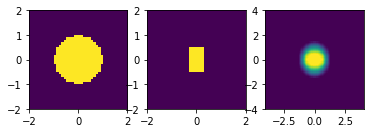

In [9]:
def ff(x,y):
    return (x**2 + y**2 <1)

def gg(x,y):
    return (abs(x)<.5)*(abs(y)<.3)

Delta = .1
x = linspace(-2,2,round(4/Delta))
y = linspace(-2,2,round(4/Delta))

ffimg = zeros((size(x),size(y)))
ggimg = zeros((size(x),size(y)))
for j in range(size(x)):
    for k in range(size(y)):
        ffimg[j,k]=ff(x[j],y[k])
        ggimg[j,k]=gg(x[j],y[k])
        
result = convolve2d(ffimg,ggimg)

subplot(1,3,1)
extent = min(x), max(x), min(y), max(y)
imshow(ffimg, extent=extent)
subplot(1,3,2)
imshow(ggimg, extent=extent)
subplot(1,3,3)
imshow(result, extent=(-4,4,-4,4))
        

## Q5.

The above example is not normalized. (The image plotting does some normalization itself, so we don't see the effects.)

Investigate by playing around with different values of $\Delta$, to see how the values of the result change. Correct the equation
$$\mbox{result = convolve2d(ffimg,ggimg)}$$
to insert a factor that normalizes the result.

(This is related to the fact we are doing a 2D sampling in the convolution integral.)

## Q6.

Four things go compute, and plot.

Take the circle image above and convolve with the small 2D filter
$$ g = \left[ \begin{array}{ccc} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{array} \right].$$ Plot it. 

Take the circle image above and convolve with the small 2D filter
$$ h = \left[ \begin{array}{rrr}  0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{array} \right].$$ Plot it. 

Take the rectangle image above and convolve with the small 2D filter $g$. Plot it. 

Take the rectangle image above and convolve with the small 2D filter $h$. Plot it.

Try it for various values of $\Delta$ and make comment about what features these filters are highlighting. 



## Q7.

Figure out how to input a black-and-white photo into your computer, and apply the filters $g$ and $h$ from Q6. Plot the result, and describe what the filters did the photo. 

## Fourier transforms.

We have seen a lot of Fourier transforms in this class, on various spaces. Let's look at the Fourier tranform on the real line, and see how it is connected to other Fourier transforms. 

The FT on the real line can be defined for a function $f(t)$ as
$$\hat{f}(\omega) = \int_{-\infty}^\infty f(t) e^{-2\pi i \omega t} \, dt.$$

NOTE in particular that $\omega$ can be any real number, and the integral goes from minus infinity to infinity. This is important, and different than our FT on an interval.

Don't forget the imaginary $i$ inside the exponential -- this is so we get sinusioidal functions, which is important for harmonica analysis. It is convenient to include the $2\pi$ in the argument, so that if $t$ is in units of seconds, then $\omega$ is in units of Hertz, or cycles per second.

(Some people prefer to measure in radians per second, which personally I find confusing.)


An approximate formula is given by replacing the integral with a sum, and samples of size $\Delta_t$, as we did with convolution. So we get, with $t = k\Delta_t$,
$$\hat{f}(\omega) \approx \Delta_t \sum_{j = -\infty}^\infty f(j\Delta_t) e^{-2\pi i \omega j\Delta_t}. $$

You might prefer to see this powers in the exponential.

$$\hat{f}(\omega) \approx \Delta_t \sum_{j = -\infty}^\infty f(j\Delta_t) (e^{-2\pi i \omega \Delta_t})^j. $$

We can go one step furthere and sample in the frequency domain, letting $\omega = k\Delta_\omega$, for integers $k$. Then we have
$$\hat{f}(k\omega) \approx \Delta_t \sum_{j = -\infty}^\infty f(j\Delta_t) (e^{-2\pi i \Delta_\omega \Delta_t})^{jk}. $$

Hopefully this makes you think of the discrete FFT. In fact, if you choose $N$ big enough to cover all the non-zero samples of $f$ in the sum, and then choose the sampling sizes so that
$$\Delta_\omega \Delta_t = \frac{1}{N},$$
then this really is the discrete FFT. SO we can use fast code to compute this.

Notice that the aample sizes $\Delta_t, \Delta_\omega$ are usually different.


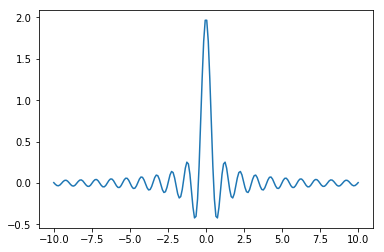

In [10]:
## Example

def f(t):
    return (t>-1)*(t<1)

Delta_t = .01
t = linspace(-2,2,round(4/Delta_t))

def fhat(w):
    return Delta_t*dot(f(t),exp(-2*pi*1j*w*t))

## Prepare the output samples of the Fourier transform
Delta_w = .1
w = linspace(-10,10,round(20/Delta_w))

fhat_out = zeros(size(w),dtype=complex_)
for k in range(size(w)):
    fhat_out[k] = fhat(w[k])

plot(w,real(fhat_out))
             



## Q8.
Repeat the above calculation, with a few interesting functions:
- the function $f(t) = 1$ for $t \in [-L,L]$, zero for other values. Try for a  few different values of $L$.
- the function $f(t) = t$ for $t \in [-l,l]$, zero for other values
- the function $f(t) = 1 - t^2$ for $t\in[-1,1]$ and zero otherwise.
- the function $f(t) = \exp(-t^2/\sigma^2)$ for a few values of $\sigma$. How is the width of the result related to $\sigma$?

Try it with different values of $\Delta_t,\Delta_w$ to convince yourself the answer is correct when these deltas are small enough. 

## Q9.

Improve my code (above) for computng the Fourier transform on the line, by using the discrete Fast Fourier Transform. You should think about where the function is non-zero, and how you might choose values for $\Delta_t,\Delta_w$ and $N$, the number of samples.

Convince me (and yourself) that your code is actually faster by doing some timing measurements. 
